# 선형회귀분석 하기

NumPy 와 Scikitleanr 을 이용해 선형회귀하는 방법을 알아보자.

1. [NumPy 이용 선형회귀 분석](#1.-NumPy-이용-선형회귀-분석)
2. [Scikit-learn 이용 선형회귀 분석](#2.-Scikit-learn-이용-선형회귀-분석)
3. [Scikilearn 으로 보스턴 주택가격 데이터 회귀분석](#3.-Scikilearn-으로-보스턴-주택가격-데이터-회귀분석)

# 1. NumPy 이용 선형회귀 분석

NumPy로 선형회귀 분석을 해보자

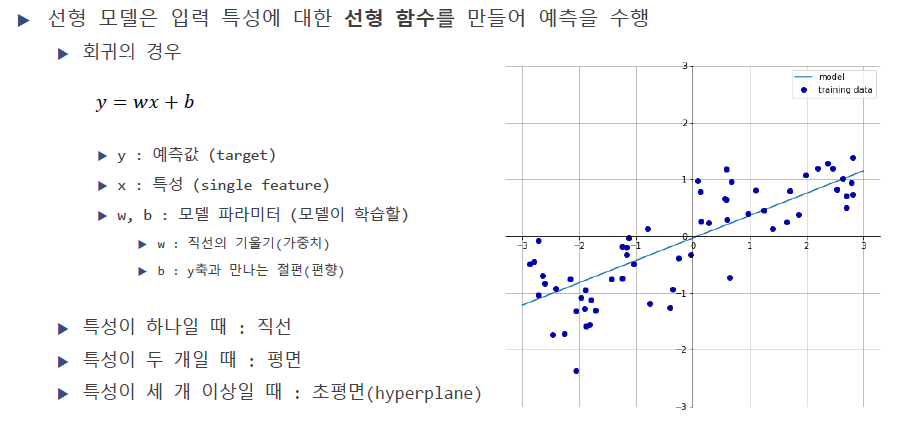

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['font.family'] = 'nanumgothic'

### make_regression()

sklearn.datasets 패키지는 다양한 연습 데이터를 제공하며 회귀와 분류 모델을 테스트하기 위한 가상 데이터를 생성하는 다양한 함수를 제공

In [2]:
from sklearn.datasets import make_regression

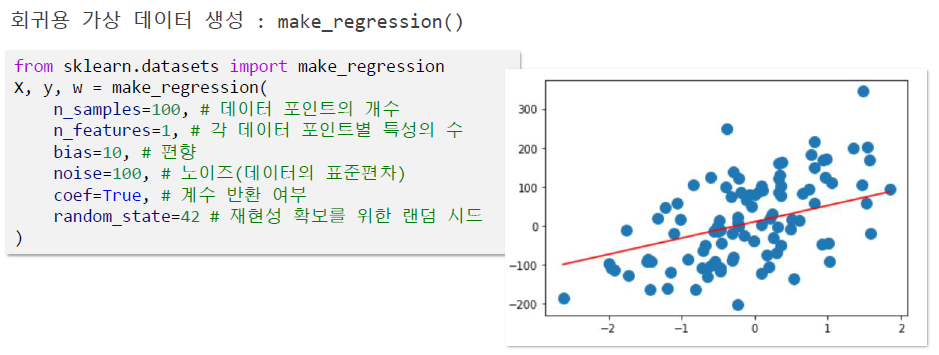

make_regression 으로 생성한 회귀모형의 식은 편중, 독립변수, 종속변수 및 회귀계수를 포함해 아래 같은 관계를 갖는다.

$$
y = 100 + 86.4479 x + \epsilon
$$


In [3]:
bias = 100 #편중
X0, y, w = make_regression(n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = np.hstack([np.ones((X0.shape[0],1)), X0])
print("X 상수항 추가:\n",
     X[:5],
     "\ny:\n",
     y[:5],
     "\n w:\n",
     w
)

X 상수항 추가:
 [[ 1.          0.23249456]
 [ 1.         -0.03869551]
 [ 1.          0.5505375 ]
 [ 1.          0.50318481]
 [ 1.          2.18697965]] 
y:
 [127.87901739  93.03291422 161.8575084  141.69205026 283.26011945] 
 w:
 86.44794300545998


In [4]:
y = y.reshape(y.shape[0],1) #y.reshape(len(y),1)

make_regression 으로 생성한 회귀모형의 식은 편중, 독립변수, 종속변수 및 회귀계수를 포함해 아래 같은 관계를 갖는다.

$$
y = 100 + 86.4479 x + \epsilon
$$

위에서 구한 수식을 이용해 선형회귀 계수를 추정하면

 - `@` 행렬곱: https://numpy.org/devdocs/user/numpy-for-matlab-users.html

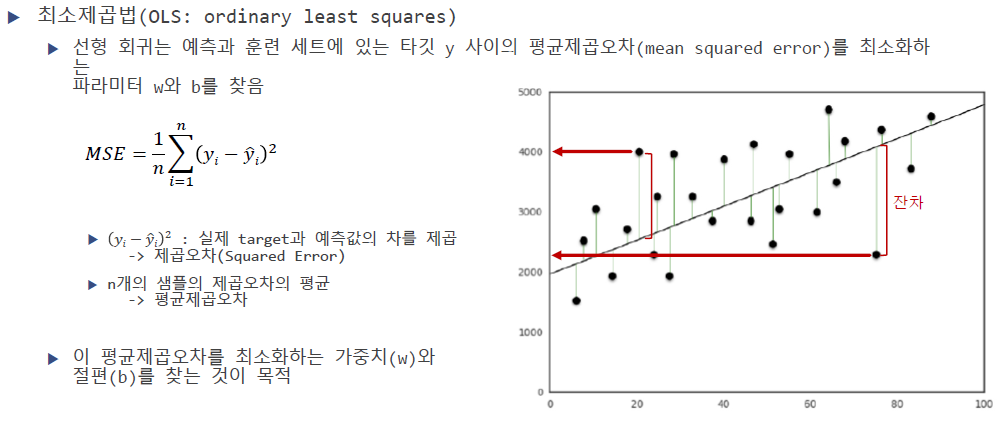

In [5]:
# OLS 해를 직접 이용하면
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

이것은 아래 방정식을 이용해 y를 예측 한다는 것이다.

$$
\hat{y} = 99.79150869 + 86.96171201 x
$$

이 결과에서 선형회귀를 통해 구한 결과는 실제(자연법칙)와 비슷하지만 정확하지는 않다는 점이다.

In [6]:
# lstsq 이용
w = np.linalg.lstsq(X, y, rcond=-1)[0]
w

array([[99.79150869],
       [86.96171201]])

다음은 여러가지 새로운 $\hat{x}$ 값에 대해 $\hat{y}$ 를 구해본 결과를 원래 데이터와 비교한 것이다.

/home/qkboo/.pyenv/versions/anaconda3-2021.05/envs/finance/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/qkboo/.pyenv/versions/anaconda3-2021.05/envs/finance/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


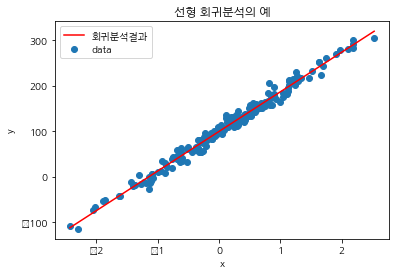

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['font.family'] = 'nanumgothic'

x_new = np.linspace(np.min(X0), np.max(X0), 100)
x_new = x_new.reshape(x_new.shape[0],-1)
X_new = np.hstack([np.ones((x_new.shape[0],1)), x_new]) #상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label='data')
plt.plot(x_new, y_new, 'r-', label='회귀분석결과')
plt.xlabel('x')
plt.ylabel('y')
plt.title('선형 회귀분석의 예')
plt.legend()
plt.show()

---

# 2. Scikit-learn 이용 선형회귀 분석

scikit-learn의 LinearRegression 으로 분석해 보자. 사이킷런의 linear_models 에서 선형 회귀를 구현한 LinearRegerssion 을 이용해 예측 회귀를 구현해 보자,
- 사이킷런의 다양한 선형모델 [linear_models](https://scikit-learn.org/stable/modules/linear_model.html)을 참조.

LinearRegression은 예측값과 실제값의 RSS를 최소화해 OLS(Ordianry Least Squares) 추정 방식으로 구현한 클래스이다.

> OLS 기반 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처 간의 상관관계가 매우 높은 경우 분산이 커져 오류에 매우 민감한다. 이런 현상을 다중 공선성(multi-collinearity) 문제라고 한다. 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용한다. 매우 많은 피처가 다중공선성 문제를 가지고 있다면 PCA를 통해서 차원 축소를 수행하는 것도 고려할 수 있다.


### `linear_model.LinearRegression()`


LinearRegression 원형이다.

```python
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
```
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression




다음 같은 입력 파라미터가 주로 쓰인다:

- fit_intercept: 기본 True. 절편(Intercept)를 계산할지 말지 여부로 상수항이 없으면 False
- normalize: 기본 False. fit_intercpet=False 인 경우 무시된다. 만약 True면 회귀를 수행전에 입력 데이터 세트를 정규화 한다.


##### fit() 메서드:

모형 추정. 상수항 결합을 자동으로 해주므로 사용자가 직접 add_constant 등의 명령를 써서 상수항 결합을 할 필요는 없다.

```python
model = model.fit(X,y)
```

회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 

 - coef_ : 추정된 가중치 벡터
 - intercept_: 추정된 상수항(절편 값).

##### predict() 메서드:

새로운 입력 데이터에 대해 출력 데이터를 예측한다.

```python
y_new = model.predcit(x_new)
```

앞의 numPy 예제를 LinearRgression 클래스로 선형호귀를 하면

In [8]:
X0[:5], y[:5]

(array([[ 0.23249456],
        [-0.03869551],
        [ 0.5505375 ],
        [ 0.50318481],
        [ 2.18697965]]),
 array([[127.87901739],
        [ 93.03291422],
        [161.8575084 ],
        [141.69205026],
        [283.26011945]]))

In [9]:
from sklearn.linear_model import LinearRegression

lg_clf = LinearRegression()
model = lg_clf.fit(X0, y)
print(model.coef_, model.intercept_)

[[86.96171201]] [99.79150869]


이것은 아래 방정식을 이용해 y를 예측 한다는 것이다.

$$
\hat{y} = 99.79150869 + 86.96171201 x
$$

이 결과에서 선형회귀를 통해 구한 결과는 실제(자연법칙)와 비슷하지만 정확하지는 않다는 점이다.

이제 predict() 메서드로 새로운 $X_{new}$ 에 대응하는 y 값을 예측할 수 있다. 차원이 있어야 하므로 2차원 데이터를 사용한다.

In [12]:
X0.max(), X0.min()

(2.528325706806398, -2.434837764107139)

In [23]:
y_pred = lg_clf.predict([[3.0]]) # or model.predict([[3]])
y_pred

array([[360.67664473]])

# 3. Scikilearn 으로 보스턴 주택가격 데이터 회귀분석

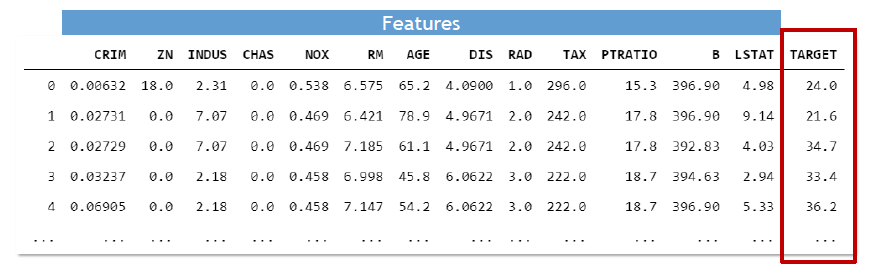

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:
# 설명서의 확인
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

데이터 피처의 속성의미는:

- CRIM: 지역별 범죄 발생률
- ZN: 25000평방미터를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS:찰스강에 대한 더미 변수 (강의 경계에 위치한 경우 1, 아니면 0)
- NOX: 일산화질수 농도
- RM: 거주할 수 있는 방의 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도록 접근 용이성
- TAX: 10000달러 당 재산세 비율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- PRICE: 주택 가격

In [3]:
# 데이터를 살펴봅시다
import pandas as pd
boston_df = pd.DataFrame(boston['data'], # 학습 데이터
                        columns=boston['feature_names'])
boston_df['TARGET'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


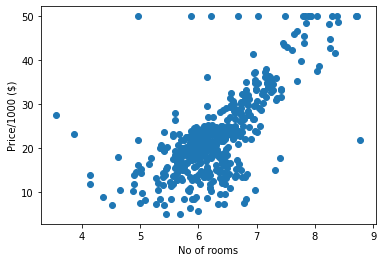

In [4]:
# RM 변수와 target과의 관계를 시각화
import matplotlib.pyplot as plt
X_rooms = boston['data'][:, 5] # 학습 데이터의 전체 행, 5번 열
# 산점도 그리기
plt.scatter(X_rooms, boston['target'])
plt.xlabel("No of rooms")
plt.ylabel("Price/1000 ($)")
plt.show()

모델 작성과 학습

In [5]:
# 선형 회귀 모델의 생성
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# 학습 진행
reg.fit(X_rooms.reshape(-1, 1), # 학습 데이터
        boston['target']) # 라벨 데이터
# 최종 목적은 회귀 선을 위한 가중치와 절편을 구하는 것
print("모델의 가중치:", reg.coef_)
print("모델의 절편:", reg.intercept_)

모델의 가중치: [9.10210898]
모델의 절편: -34.670620776438554


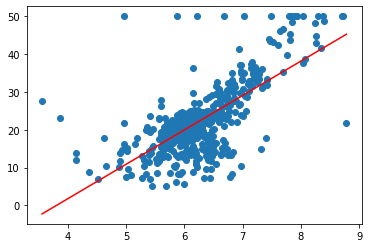

In [6]:
# 실제 학습 데이터와 회귀선
import numpy as np
pred_space = np.linspace(
    min(X_rooms), max(X_rooms)
).reshape(-1, 1)
# 산점도를 그려 봅니다.
plt.scatter(X_rooms, # x축
            boston['target']) # y축
# 회귀선 
plt.plot(pred_space, # X축
         reg.predict(pred_space),
         color="red"
        ) # 우리 모델의 예측값
plt.show()

In [7]:
# boston 데이터 셋 모든 특성을 이용한 예측
# 학습 데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston['data'], boston['target'],
    test_size=0.3, # 테스트 데이터 셋 사이즈 30%
    random_state=42 # 재현성 확보를 위한 랜덤 시드
)

In [8]:
# 학습 진행
reg_all = LinearRegression()
reg_all.fit(X_train, y_train) # 학습 데이터와 학습 라벨

LinearRegression()

In [9]:
# 가중치와 절편
print("가중치:", reg_all.coef_)
print("절편:", reg_all.intercept_)

가중치: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
절편: 31.63108403569312


In [10]:
# 모델 검증
print("훈련 세트 점수: {:.2f}".format(reg_all.score(X_train, y_train))) # 학습 데이터 
print("테스트 세트 점수: {:.2f}".format(reg_all.score(X_test, y_test))) # 테스트 데이터

훈련 세트 점수: 0.74
테스트 세트 점수: 0.71


In [11]:
# 보스턴 데이터 셋의 첫번째 데이터와 타겟
print("데이터 셋 관측치:", boston['data'][1])
print("데이터 셋 label:", boston['target'][1])
# 모델이 예측한 예측치
reg_all.predict(boston['data'][1].reshape(1, 13))

데이터 셋 관측치: [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
 7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
 9.1400e+00]
데이터 셋 label: 21.6


array([24.90986918])

# Ridge 회귀

In [12]:
# Ridge 회귀
# L2 규제를 사용하여 특성의 계수(기울기)를 최소화하는 모델
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, # 알파 계수(규제)
             normalize=True)
ridge.fit(X_train, y_train)

print("Ridge 훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge 테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

Ridge 훈련 세트 점수: 0.74
Ridge 테스트 세트 점수: 0.70


In [13]:
# Lasso 회귀
# L1 규제를 사용하과 특정 계수를 0으로 만들어서 영향을 없애는 효과(특성 선택)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, # 규제 계수
             normalize=True)
lasso.fit(X_train, y_train)

print("Lasso 훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train))) # 학습 세트 점수
print("Lasso 테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("계수:", lasso.coef_)
# 라소 회귀는 특정 계수를 0으로 만든다
print("사용된 특성의 갯수:", np.sum(lasso.coef_ != 0))

Lasso 훈련 세트 점수: 0.62
Lasso 테스트 세트 점수: 0.60
계수: [-0.          0.         -0.          0.         -0.          3.18852894
 -0.         -0.         -0.         -0.         -0.3066901   0.
 -0.48666476]
사용된 특성의 갯수: 3


In [20]:
import sklearn
sklearn.__version__

'0.23.2'